<a href="https://colab.research.google.com/github/mjplacroix/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS11_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [61]:
import numpy as np
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean = sum(sales)/len(sales)
print("mean: ", mean)
var = sum((mean - value) ** 2 for value in sales) / (len(sales) - 1)
print("var: ", var)
# checking math with numpy
var_np = np.var(sales, ddof=1)
print("var from np: ", var_np)
sqrt = math.sqrt(var_np)
sqrt_2 = (var_np)**(.5)

print("standarad deviation: ", round(sqrt))
print("standarad deviation #2: ", round(sqrt_2))


# Variance is the average of the squared differences from the mean

mean:  3052.714285714286
var:  214387.90476190473
var from np:  214387.90476190473
standarad deviation:  463
standarad deviation #2:  463.0


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [62]:
import pandas as pd 


customers = [127, 80, 105, 92, 120, 115, 93]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


covar = np.cov(customers, sales)
print(covar)


[[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


In [63]:
import pandas as pd 

sales_data = {"customers": customers, "sales": sales}

df = pd.DataFrame(sales_data)

print(df.cov())

covars = np.cov(customers, sales)
cust_covar = covars[0][0]
print(cust_covar)
sales_covar = covars[1][1]
print(sales_covar)

             customers          sales
customers   290.952381    7604.357143
sales      7604.357143  214387.904762
290.95238095238096
214387.90476190473


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [64]:
customers = [127, 80, 105, 92, 120, 115, 93]
mean = sum(customers)/len(customers)
print("mean: ", mean)
var = sum((mean - person) ** 2 for person in customers) / (len(customers) - 1)
print("var: ", var)
# checking math with numpy
var_np = np.var(customers, ddof=1)
print("var from np: ", var_np)
sqrt_3 = math.sqrt(var_np)
sqrt_4 = (var_np)**(.5)
print("standarad deviation: ", round(sqrt_3))
print("standarad deviation #2: ", round(sqrt_4))

# standardize the covariance
corr_co = (covars[0][1]) / (sqrt_3 * sqrt)
print("correlation coefficent: ", corr_co)

# super confused as how we go from 1 correlation coefficient to numbers for all 4 ranging from -1:0:1
# no longer confused - I think
corr_co_np = np.corrcoef(customers, sales)
corr_co_np

mean:  104.57142857142857
var:  290.95238095238096
var from np:  290.95238095238096
standarad deviation:  17
standarad deviation #2:  17.0
correlation coefficent:  0.9628339778148909


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [65]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

# variance-covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [66]:
# correlation matrix 
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

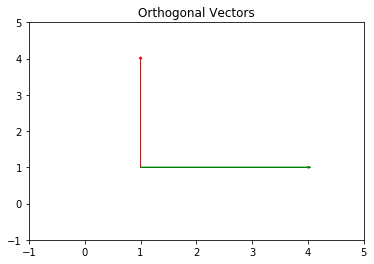

In [67]:
# synonym: perpendicular
import matplotlib.pyplot as plt

vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(1,1, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(1,1, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [68]:
# dot product tells us whether they're orthogonal
import numpy as np

vec_a = [-5, 3, 7]
vec_b = [6, -8, 2]

orthog = np.dot(vec_a, vec_b)
print(orthog)
#no becase the dot product does NOT equal 0

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [69]:
import numpy as np
import pandas as pd

vec_c = np.array([2, -15, 6, 20])
vec_c_T = vec_c.T

# df = pd.DataFrame(vec_c)
# df_T = df.T
# print(df_T)
# print(df)

print("norm: ", (np.linalg.norm(vec_c)**2))
print("dot product: ", np.dot(vec_c, vec_c))
print("transposition X vector_c: ", np.matmul(vec_c.T, vec_c))

# they're all the same number

norm:  665.0
dot product:  665
transposition X vector_c:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}  = 7\hat{i} + 12\hat{j}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [70]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)

unit_vec = f/f_norm
print("unit vector: ", unit_vec)


unit vector:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

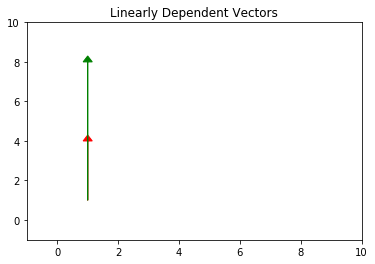

In [71]:
vector_1 = [0, 3]
vector_2 = [0, 7]

plt.arrow(1,1, vector_1[0], vector_1[1],head_width=.3, head_length=0.3, color ='red')
plt.arrow(1,1, vector_2[0], vector_2[1],head_width=.3, head_length=0.3, color ='green')
plt.xlim(-1,10)          
plt.ylim(-1,10)
plt.title("Linearly Dependent Vectors")
plt.show()



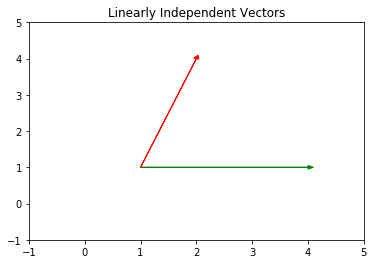

In [72]:
vector_1 = [1, 3]
vector_2 = [3, 0]

plt.arrow(1,1, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(1,1, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

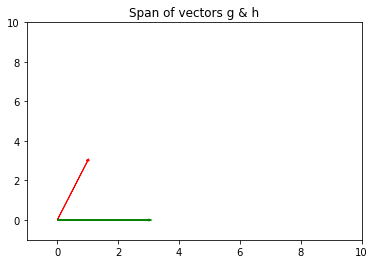

In [73]:
vector_g = [1, 2]
vector_h = [4, 8]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,10)          
plt.ylim(-1,10)
plt.title("Span of vectors g & h")
plt.show()

# span is R1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# compose into a matrix - find rank of matrix

span = [[1, 2, 3],
        [-1, 0, 7],
        [4, 8, 2]]
# add 1x first row to second row
span = [[1, 2, 3],
        [0, 2, 10],
        [4, 8, 2]]

# add -4x first row to third row
span = [[1, 2, 3],
        [0, 2, 10],
        [0, 0, -10]]

# needed help here
# multiply the 2nd row by 1/2	
span = [[1, 2, 3],
        [0, 1, 5],
        [0, 0, -10]]
# multiply the 3rd row by -1/10

span = [[1, 2, 3], 
        [0, 1, 5],
        [0, 0, 1]]

 # conclusion - span is R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



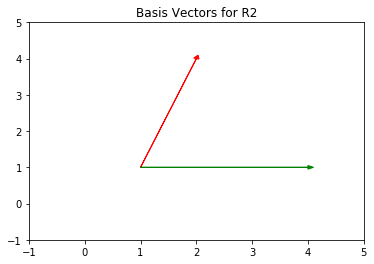

In [77]:
vector_1 = [1, 3]
vector_2 = [3, 0]

plt.arrow(1,1, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(1,1, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Basis Vectors for R2")
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors that are A) linearly independent and B) span the vector space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Rank is $\mathbb{R}^3$







## 7.2 What does the rank of a matrix tell us?

In [0]:
# compose into a matrix - find rank of matrix

# rank of a matrix tells essentially how many dimensions it covers
# VS the span with tells us the set of all possible vectors
    # but we still describe span as R2 or R3 no? 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

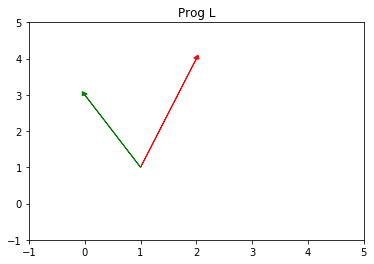

In [79]:
vector_1 = [1, 3]
vector_2 = [-1, 2]

plt.arrow(1,1, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(1,1, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Prog L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

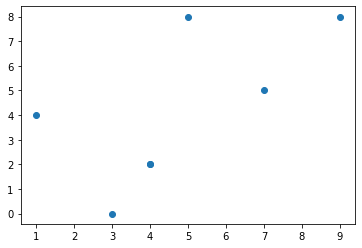

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()